<a href="https://colab.research.google.com/github/raflidzaky/stock-market-analysis/blob/main/Data_Analysis_Project_Analyzing_Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Settings
This step includes installing packages of the stock market data set and import libraries. While the data set is ready, the next step is even more crucial: understanding the data.

In [1]:
!pip install yfinance

In [2]:
# Data set package
import yfinance as yf

# Libraries for data wrangling and analyses
import datetime as dt
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from statsmodels.tsa.stattools import adfuller

# Libraries for visualization: setting the charts ready
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
# Import the data set
dataset = yf.download('BAC', start='2004-01-01', end='2016-01-01')

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Read the data set
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-02,39.875000,40.215000,39.455002,39.544998,24.917013,16897000
2004-01-05,39.660000,39.799999,39.360001,39.660000,24.989473,14535400
2004-01-06,39.560001,39.695000,39.400002,39.595001,24.948521,15083600
2004-01-07,39.525002,39.584999,39.404999,39.505001,24.891813,13346200
2004-01-08,39.505001,39.570000,39.375000,39.525002,24.904406,13774200
...,...,...,...,...,...,...
2015-12-24,17.320000,17.379999,17.219999,17.270000,14.553587,29369400
2015-12-28,17.219999,17.230000,16.980000,17.129999,14.435605,41777500
2015-12-29,17.250000,17.350000,17.160000,17.280001,14.562012,45670400


# Understanding Data set
Several tasks are need to be done:

1. **Understanding the table structure**
2. **Looking for data tidiness issue**
3. **Understanding structure of the data (dimension/columns).** This includes dimension definition



## **Understanding the table structure**
> Relevant questions:
- How much observations and columns exist in the data?
- What is the index of the table? Does current index relevant? If no/yes, why? (This question is vital prior to data visualization practice).
- How do the data type? Do they consistent?

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3021 entries, 2004-01-02 to 2015-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3021 non-null   float64
 1   High       3021 non-null   float64
 2   Low        3021 non-null   float64
 3   Close      3021 non-null   float64
 4   Adj Close  3021 non-null   float64
 5   Volume     3021 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 165.2 KB


Apparently, there are 7 columns in the data set. First one is index column (date-based format), the rest are information of the stock market. **Apparently, all of the price-related columns have a float data type, while volume is stored as integer**. The data set has **3021 records/observations** for every date index. We assume the index is unique unless stated otherwise in the next section.

Now, we could address the index format issue. Is it relevant? In this context, it will not relevant. As it will made the coordinate format, for any data visualization below, harder. This is true because the date could not directly processed by "calling" it like this

> ```dataset.index```

The next step is making the data set index as it should be, started with 0 until n numbers.




In [5]:
# Make a column to store the date
dataset['Date'] = dataset.index

# Reorder the newest column to the first order
dataset = dataset.iloc[:, [6, 0, 1, 2, 3, 4, 5]]

# Changing the index incrementally
dataset.index = range(len(dataset['Open']))
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-02,39.875000,40.215000,39.455002,39.544998,24.917013,16897000
1,2004-01-05,39.660000,39.799999,39.360001,39.660000,24.989473,14535400
2,2004-01-06,39.560001,39.695000,39.400002,39.595001,24.948521,15083600
3,2004-01-07,39.525002,39.584999,39.404999,39.505001,24.891813,13346200
4,2004-01-08,39.505001,39.570000,39.375000,39.525002,24.904406,13774200
...,...,...,...,...,...,...,...
3016,2015-12-24,17.320000,17.379999,17.219999,17.270000,14.553587,29369400
3017,2015-12-28,17.219999,17.230000,16.980000,17.129999,14.435605,41777500
3018,2015-12-29,17.250000,17.350000,17.160000,17.280001,14.562012,45670400
3019,2015-12-30,17.200001,17.240000,17.040001,17.049999,14.368184,35066400


## **Looking for data tidiness issue**
> Relevant questions:
> - Is it any missing value in the data?
> - Are there any rows that have duplicated values?


In [ ]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Check duplicated values in each rows
for column in dataset.columns:
  duplicate_state = dataset.duplicated(keep='first').sum()
  print(f'{column}', ' ', duplicate_state)

Date   0
Open   0
High   0
Low   0
Close   0
Adj Close   0
Volume   0


## **Understanding the structure of each dimension/columns**

> Relevant question:
> - What is the definition of each dimension? Knowing this would be useful to do analysis



The (simplified) definition of each dimension is following:
1. Open: Price of the first transaction in the a business day
2. High: Highest price for a traded security given the period, in this case is business day.
3. Low: Lowest price for a traded security given the period, in this case is business day.
4. Close: Price of the last transaction in the end of a business day
5. Adj. Close: This is a closing price w take account companies' action that affect the companies' stock values. Hence, this column reflect the underlying stock performance.
6. Volume: Total numbers of share traded at given day

# Exploratory Data Analysis

This exploratory data analysis will find out overall characteristics of our data. The difference between soon descriptive diagnostic is no narrative included, at least for this project.

My approach to do exploratory data analysis is a top down analysis. Coming from generic description (descriptive statistics and distribution analysis) and correlation heatmap.

Outlier analysis is not included in this project. Why? Since I use time-series data analysis, which cautiously non-stationary issues (such as trends, shocks, or else), that might have bunch significantly higher or lower data points (relative from the group).

## Generic Analysis

In [ ]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3021.000000,3021.000000,3021.000000,3021.000000,3021.000000,3.021000e+03
mean,25.797373,26.071700,25.497661,25.776112,18.945896,1.130451e+08
std,16.140049,16.220808,16.066393,16.148807,10.565154,1.253977e+08
min,3.220000,3.510000,2.530000,3.140000,2.549809,2.400800e+06
25%,13.280000,13.450000,13.100000,13.270000,10.838885,1.584360e+07
50%,16.790001,17.010000,16.610001,16.780001,13.844431,7.959980e+07
75%,43.750000,44.049999,43.410000,43.724998,29.515821,1.575283e+08
max,55.040001,55.080002,54.820000,54.900002,38.902905,1.226791e+09


In [ ]:
def skewness_value(input):
  '''
      Logic of this function is to calculate skewness of each column within the data set.
      On top of that, scipy stats require an axis specification, otherwise, it'll ravel (flatten)
        the dataset and compute the skewness statistic as once.

      Thus, I specify the data set column and then I will no longer need to set axis specification in skew function.
      The next step is setting the for loop that compute the skew statistic. That for loop will also show which column is computed.
      For each operation done, the skewness variable will be updated according to next entry of input
  '''

  for i in input:
    skewness = dataset[i].skew(axis=None).round(3)
    print(i, ':', skewness)

# Input: Data set column specification
skewness_value(input=dataset.iloc[:, 1:7])

Date : 0.0
Open : 0.465
High : 0.459
Low : 0.472
Close : 0.466
Adj Close : 0.457


In [ ]:
def kurtosis_value(input):
  '''
      This function triggers to check kurtosis value of each columns.
      Hence, I do a for loop to count each column's kurtosis without any hard-code.
      It is shown that the for loop address i-th column, which defined as the input (first until seventh columns)
  '''
  for i in input:
    kurtosis = dataset[i].kurtosis(axis=None).round(3)
    print(i, ':', kurtosis)

kurtosis_value(input=dataset.iloc[:, 1:7])

Open : -1.478
High : -1.489
Low : -1.467
Close : -1.477
Adj Close : -1.299
Volume : 9.929


**Quick interpretation:**

Since all of the columns has positive skewness, I can imply that the data distribution is skewed to the right.

For addition, most of the columns have a negative kurtosis. This imply that the data is scattered (e.g. not centered in a certain value). Only volume that had a certain value.

The unique case of volume column might be related to seasonal patterns. In a certain business days or months, there are an increase of stocks traded, that are centered to a certain range value. This pattern might be persistent and if soon data visualization confirms such seasonal pattern, this is very likely why.

Before jump to data visualization, I'd like to test whether the data are pure random observations or no. I will use ADF test. Note that we need to interpret as:
> **If the p-value is lower than 0.05, ADF test confirms the data are ''pure random''**. Otherwise there are might exist some patterns.
However, note that this test actually do not test whether the data have any trends/seasonalities. It just say that we have to investigate further if the p-value is higher than 0.05

In [34]:
# Take the columns' name as an array
# Use this array to loop ADF test
dataset_columns = dataset.iloc[:, 1:7].columns

for i in dataset_columns:
  result = adfuller(dataset[i])
  print(i)
  # Specify the float precision of ADF statistic
  print(f'ADF Statistic: {result[0]:.6f}')
  print(f'p-value: {result[1]:.6f}')
  print('==========================')

Open
ADF Statistic: -0.989975
p-value: 0.756903
High
ADF Statistic: -1.022680
p-value: 0.744903
Low
ADF Statistic: -1.024458
p-value: 0.744239
Close
ADF Statistic: -0.989504
p-value: 0.757073
Adj Close
ADF Statistic: -1.003319
p-value: 0.752052
Volume
ADF Statistic: -2.550699
p-value: 0.103621


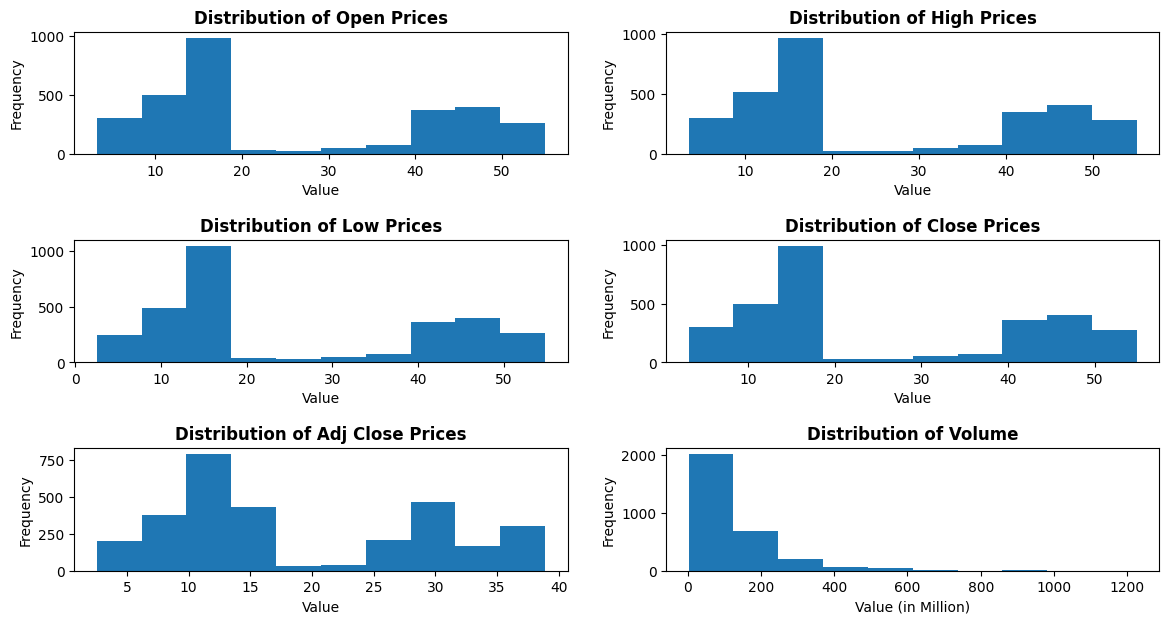

In [ ]:
def millions_formatter(x, position):
  '''
      This function to re-scale the volume value in the x-axis. Since the volume has a vast number,
      standard matplotlib graphics could not display the x-axis as it should. Hence, it needs to
      be rescaled by a million unit.

      This function will return the re-scaled value to be displayed in x-axis as position
  '''
  x_val = int(x/1000000)
  return x_val


def make_a_distribution_plot(input):
  '''
      This function mainly to plot distribution of each columns.
      I state number of rows and columns in the figure directly, so that I didn't need to hard-code each graphics.

      Here, note that there are 2 args on the for loop. Given the axes only accept integer/boolean, while
      I also need each columns' name, I need to zip those two args. Hence, I could throw different values for
      each looping: indexes and columns' name.
  '''
  fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[14, 7])
  fig.subplots_adjust(hspace=0.7)
  axes = axes.ravel()

  for i, j in enumerate(dataset_columns):
    dataset[j].hist(ax=axes[i], grid=False)
    axes[i].set_title(f'Distribution of {j} Prices', fontweight='bold')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel('Value')

  axes[5].xaxis.set_major_formatter(FuncFormatter(millions_formatter))
  axes[5].set_title('Distribution of Volume', fontweight='bold')
  axes[5].set_xlabel('Value (in Million)')

make_a_distribution_plot(input=dataset)

**Quick Interpretation**
This explains that prices (open, high, low, close, and adj. close) have a similar behavior. They scattered at 5-15 and 25-50. This trully make me curious:
- Do they correlate each other?
- Does this price behavior affect demand (measured by 'volume')?


# Correlation Analysis

In [ ]:
price_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# Loop the correlation of 1st column to the ith column
for pc in price_columns:
  correlation = dataset.corr()[pc].sort_values(ascending=False)
  print(correlation)
  print('==========')

Open         1.000000
High         0.999719
Low          0.999695
Close        0.999501
Adj Close    0.992812
Volume      -0.645502
Name: Open, dtype: float64
High         1.000000
Open         0.999719
Close        0.999705
Low          0.999429
Adj Close    0.993495
Volume      -0.641772
Name: High, dtype: float64
Low          1.000000
Close        0.999716
Open         0.999695
High         0.999429
Adj Close    0.992373
Volume      -0.649723
Name: Low, dtype: float64
Close        1.000000
Low          0.999716
High         0.999705
Open         0.999501
Adj Close    0.993234
Volume      -0.645710
Name: Close, dtype: float64
Adj Close    1.000000
High         0.993495
Close        0.993234
Open         0.992812
Low          0.992373
Volume      -0.649216
Name: Adj Close, dtype: float64


<ipython-input-10-855281f780be>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()[pc].sort_values(ascending=False)


<ipython-input-20-f9d8f7006adb>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=False,


Text(0.5, 1.0, 'Correlation Heatmap')

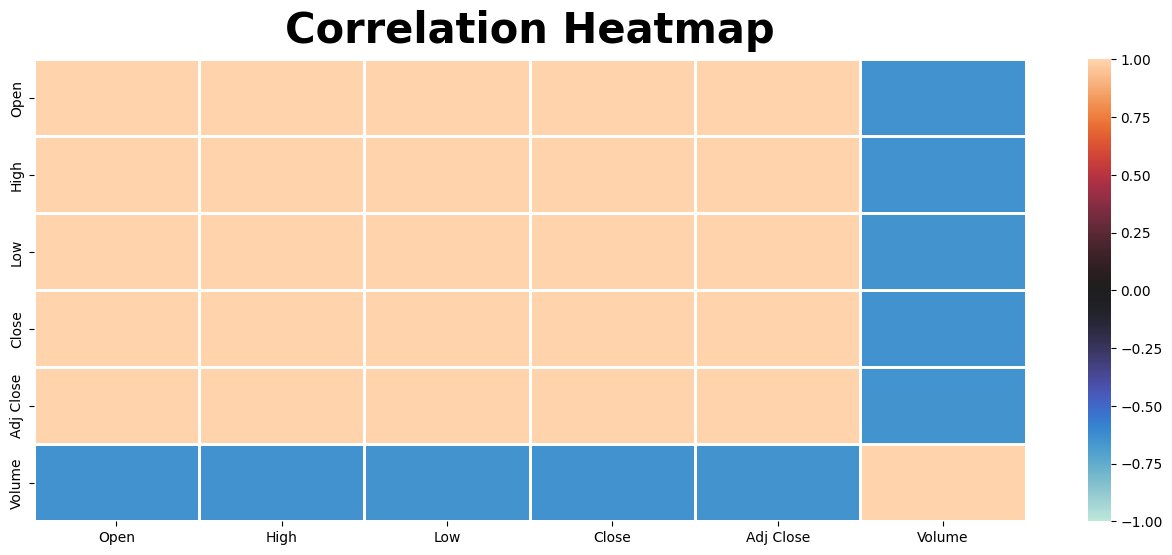

In [ ]:
# Make a figure for heatmap correlation plot
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=False,
                      linecolor='white', linewidths=1, center=0)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontsize=30,
                  fontweight='bold', pad=12)

**Quick Interpretation**

Using correlation coefficient (visualized by heatmap graphics), the prices really correlate with each other. This is partially shocking, since adj. close price would obviously have a strong correlation with close price. Why? Adj. close is a "product" of close price itself. However, what's shocking is the other price component.

> I would describe the price as a pairing individuals. They are sensitive to each other dynamics. The different is, each price column come from different timeline (hour stamp). Recall the definition of open and close price, while high and low price are somewhere in between open and close price.

> What's happening in open price, would likely play a domino effect to high, low, and close. Also, current open price might be affected by previous open price and might affect future open price.

At the other hand, demand consistently negatively correlate with the price.

This EDA, luckily give me more insights to do descriptive analysis:
> - There are two dynamics that need to be addressed: day-to-day partial price component and in-day price component (dynamics of price components in a day)
- Address shocks or cyclical dynamics


# Descriptive Analysis

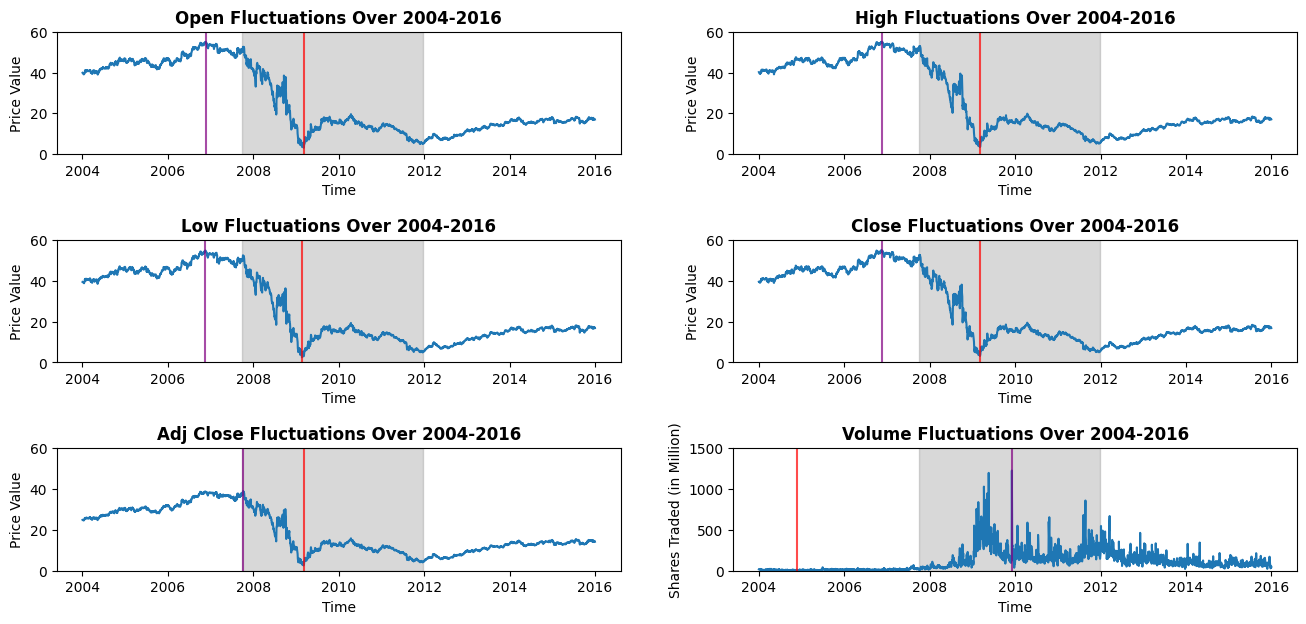

In [35]:
def millions_formatter(x, position):
      x_val = int(x/1000000)
      return x_val

def make_line_plot(input):
  '''
      The mechanism of this function is quite same as previous make_a_distribution_plot() function.
      1. It requires two arguments
      2. Re-scale the volume displayed in a specific axis

      The differences are:
      1. Using line plot to display trends
      2. Set additional atributes (lines and areas) to show highlights
  '''
  fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[16, 7])
  fig.subplots_adjust(hspace=0.7)
  axes = axes.ravel()

  for i, j in enumerate(dataset_columns):
    axes[i].plot(input['Date'], input[j])
    axes[i].set_title(f'{j} Fluctuations Over 2004-2016', fontweight='bold')
    axes[i].set_ylabel('Price Value')
    axes[i].set_xlabel('Time')
    axes[i].set_ylim(0, 60)
    axes[i].axvline(input['Date'].loc[input[j].idxmin()],
                  alpha=0.7, color='red')
    axes[i].axvline(input['Date'].loc[input[j].idxmax()],
                  alpha=0.7, color='purple')
    axes[i].axvspan('2007-09-30', '2011-12-25', color='gray', alpha=0.3)

  axes[5].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
  axes[5].set_ylim(0, 1500000000)
  axes[5].set_ylabel('Shares Traded (in Million)')

  return plt.show()

make_line_plot(input=dataset)

**Quick Interpretation**
There are four aspect that quite interesting:
- First, shaded area is a place where the price having declining trends, while demand having higher volume.
- Second, lowest price (red line in price component) does not lead to highest demand (purple line in volume).
- Third, highest price (purple line in price component) does not lead to lowest demand (red line in volume).
- Fourth, the start of price decline does not followed by start of demand peak rightaway. It shows that there is a lag of response.

Note that the demand volume is very noisy. Even after the end of shaded area (which the prices started to rise), the demand not consistently show a declining trend (noisy ups and downs)

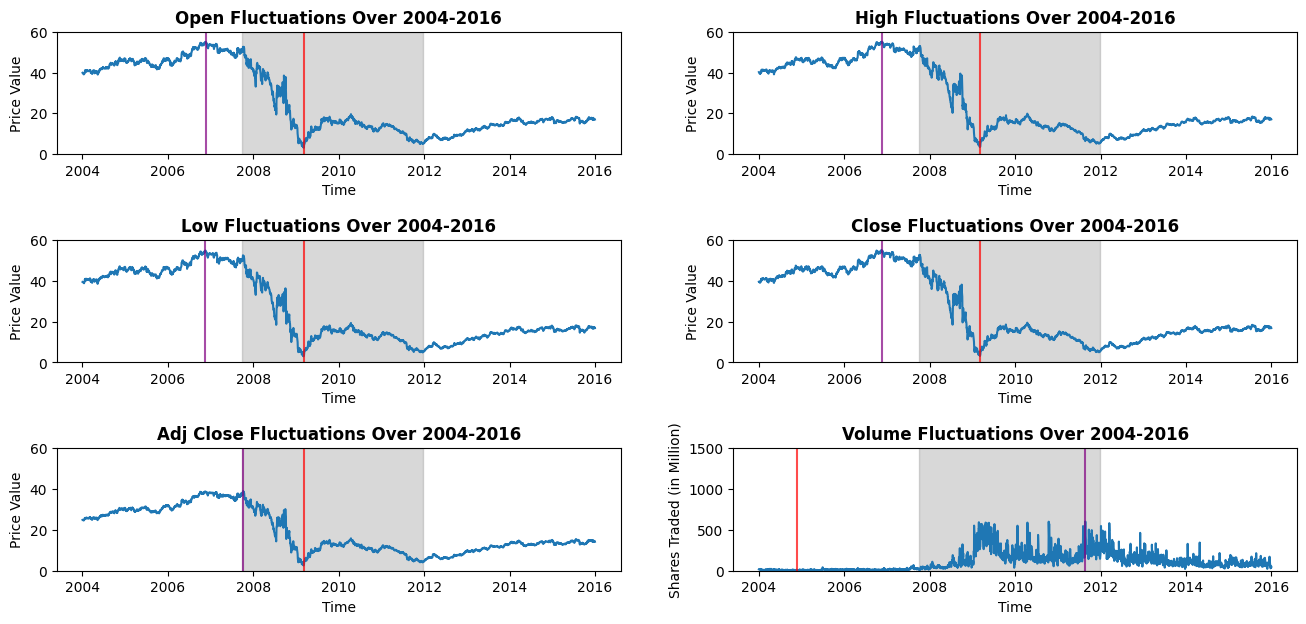

In [48]:
def denoising_the_data(data, column):
  '''
      This function performs as denoising operators. The logic is simple:
      It will query the data if the defined column has greater value than
      (mean - 5 * standard deviation) and lesser value than (mean + 5 * standard deviation).
      Hence, it will show data with no 'boom'-like values
  '''
    quartiles = np.percentile(data[column], [25, 50, 75])
    mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
    # Query the dataset value which is NOT in the outside of pre-defined ranges
    lesser_noise_dataset = data.query(f'({column} > @mu - 5 * @sig) & ({column} < @mu + 5 * @sig)')
    return lesser_noise_dataset

denoising_the_data(data=dataset, column='Volume')

make_line_plot(input=denoising_the_data(data=dataset, column='Volume'))


Again, after denoising the data, we got the same volume behavior as above. The peak demand does not located where the price is the lowest. Also, demand increases significantly where the price also decline significantly (located somewhere in between 2008 and 2010).

However, note that graphic above does not shows cyclical patterns. Instead, prices' ups and downs kinda happen "randomly". We need to take a closer look for each component.

In [ ]:
'''
      This function wants to zoom-in the line plot to a specific column. In this case, open price column.
      However, I also need to label each line which in i-th year. For addition, I need to make the
      color more aesthetic. Hence, I use color map (packs of colors) and index them to
      label each year.

      For further reading about colormap, this documentation may help you:
      https://matplotlib.org/stable/users/explain/colors/colormaps.html

      I also add addtional description in the graphics, to add more highlights.
'''


<Axes: xlabel='Date', ylabel='Open Price'>

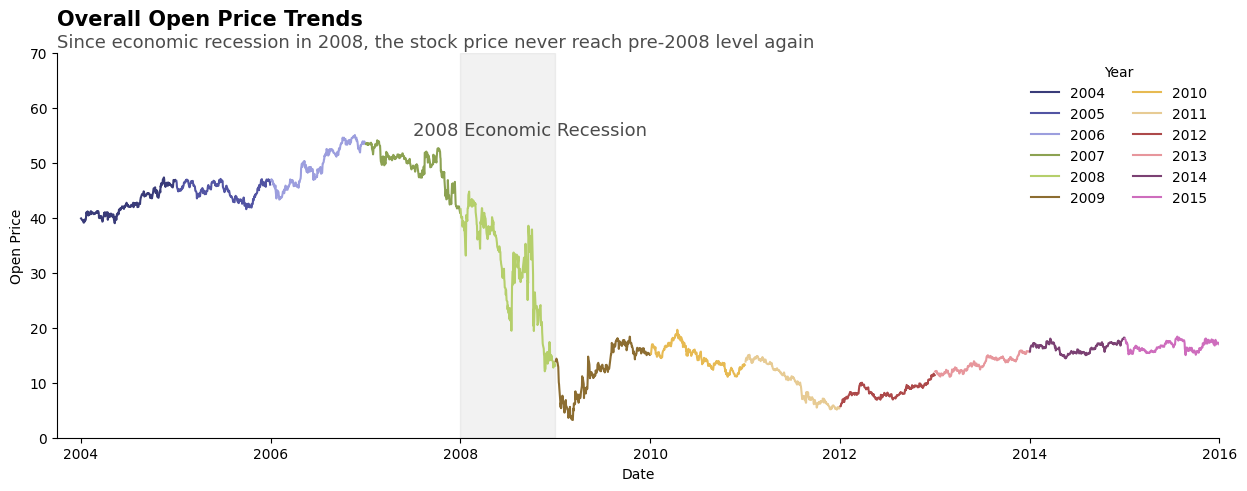

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

def make_yearly_open_price(input):
  fig, ax = plt.subplots(figsize=[15, 5])
  years = input['Date'].dt.year.unique()
  cmap = plt.get_cmap('tab20b')

  for i, y in enumerate(years):
    yearly_data = input[input['Date'].dt.year == y]
    color = cmap(i / len(years))
    ax.plot(yearly_data['Date'], yearly_data['Open'], label=str(y), color=color)

  ax.set_xlabel('Date')
  ax.set_ylabel('Open Price')
  ax.legend(title='Year',
            frameon=False,
            ncol=2)
  ax.set_ylim(0, 70)
  ax.set_xlim(pd.to_datetime('2003-10-01'), pd.to_datetime('2016-01-01'))
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  ax.axvspan('2008-01-01', '2008-12-31',
             color='gray', alpha=0.1)

  ax.text(pd.to_datetime('2003-10-01'), 75,
          'Overall Open Price Trends',
          fontdict={'size': 15,
                    'weight': 'bold'})
  ax.text(pd.to_datetime('2003-10-01'), 71,
          'Since economic recession in 2008, the stock price never reach pre-2008 level again',
          fontdict={'size': 13},
          alpha=0.7)
  ax.text(pd.to_datetime('2007-07-01'), 55,
          '2008 Economic Recession',
          fontdict={'size': 13},
          alpha=0.7)


  return ax

make_yearly_open_price(input=dataset)

<Axes: xlabel='Date', ylabel='Volume Stocks Bought'>

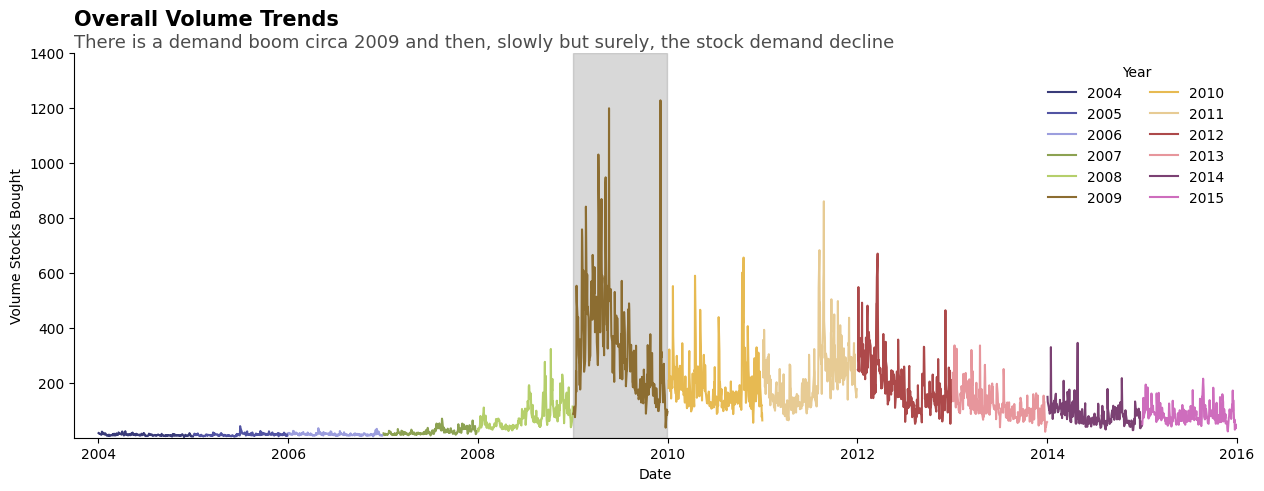

In [ ]:
def make_yearly_volume(input):
    fig, ax = plt.subplots(figsize=[15, 5])
    years = input['Date'].dt.year.unique()
    cmap = plt.get_cmap('tab20b')

    for i, y in enumerate(years):
        yearly_data = input[input['Date'].dt.year == y]
        color = cmap(i / len(years))
        ax.plot(yearly_data['Date'], yearly_data['Volume'],
                label=str(y), color=color)

    ax.set_xlabel('Date')
    ax.set_ylabel('Volume Stocks Bought')
    ax.legend(title='Year',
              frameon=False,
              ncol=2)
    ax.set_ylim(500, 1400000000)
    ax.set_xlim(pd.to_datetime('2003-10-01'), pd.to_datetime('2016-01-01'))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

    ax.axvspan('2009-01-01', '2009-12-31', color='gray', alpha=0.3)

    ax.text(pd.to_datetime('2003-10-01'), 1500000000,
            'Overall Volume Trends',
            fontdict={'size': 15,
                      'weight': 'bold'})

    ax.text(pd.to_datetime('2003-10-01'), 1420000000,
            'There is a demand boom circa 2009 and then, slowly but surely, the stock demand decline',
            fontdict={'size': 13},
            alpha=0.7)

    return ax

make_yearly_volume(input=dataset)

There are several interesting things:
1. The demand started to decline in the middle of 2009. However, there is a demand boom (again) circa December 2009.
2. Although started to decline, the demand seems increased in the middle of 2011.
3. Even we have a bigger canvas for volume's chart, I barely see a repeated cycle. For example,
> - 2009, 2010, and 2012 have their peaks in first and last year.
  - However, 2013 and 2014 have their peaks in first half of year.
  - In the other hand, 2008 and 2011 have their peaks in last half of year.
  - **It is implied that no clear monthly pattern over years**
4. I assume I need to see a closer look on each year's volume. Such decision will let me to see their monthly behavior.
5. Although price in 2008 droped significantly than 2009, it is shown that demand boom was not in 2008. We knows that people, although demand for "lower price", they still "wait and see" the condition: waiting for economic certainty for any investment.


## Growth Analysis

In [6]:
def make_growth_dataframe(input):
  '''
      This function is iterating two things:
      1. Iterate to calculate growth in each row (for a specified column)
      2. Do such things to other columns

      The results will be stored in a list first and then re-stored as dataframe

      There are several things need to be highlighted:
      1. First rows always result in zero growth (because no previous row),
      2. After filling the first rows with zero value, continue to calculate
      3. To avoid errors because of zero division (which resulted in undefined value),
         I make a try-except Error Handling with specified instruction (append with 0).
         Hence, no unnecessary ZeroDivision-related errors would happen.
      4. There is two main local value:
          a. growth: empty list to be filled with raw growth values
          b. growth_data: transform the empty list to a data set with defined-column names

      The flow of this function:
      1. First, for each row pointed, it calculate the column's row growth
      2. The values will be thrown at temporal list variable: growth
      3. Then, it'll make a dataframe variable (growth_data) with growth variable as the value
      4. Since, the first rows somehow still not zero-value, it needs a hard code by
         directly change the value
      5. The function is running with defined input and it is stored inside growth_dataframe
  '''
  # Create an empty DataFrame
  growth_data = pd.DataFrame()
  for column_name in input:
      # Define growth list for each column
      growth = []
      for j in range(len(dataset[column_name])):
          try:
              # Calculate growth
              growth_value = (dataset[column_name].iloc[j] - dataset[column_name].iloc[j-1]) / dataset[column_name].iloc[j-1]
              # Scale it to percentages
              growth_percentage = growth_value * 100
              # Limit to two decimals
              growth.append(round(growth_percentage, 2))
          except ZeroDivisionError:
              growth.append(0)
      # Add growth values to DataFrame
      growth_data[column_name + '_Growth'] = growth
      growth_data.iloc[0:1, 0:7]  = 0.0
  return growth_data

# Make growth data set first
growth_dataframe = make_growth_dataframe(input=dataset.iloc[:, 1:7])
dataset = pd.concat([dataset, growth_dataframe], axis=1)
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,Open_Growth,High_Growth,Low_Growth,Close_Growth,Adj Close_Growth,Volume_Growth
0,2004-01-02,39.875000,40.215000,39.455002,39.544998,24.917013,16897000,0.00,0.00,0.00,0.00,0.00,0.00
1,2004-01-05,39.660000,39.799999,39.360001,39.660000,24.989473,14535400,-0.54,-1.03,-0.24,0.29,0.29,-13.98
2,2004-01-06,39.560001,39.695000,39.400002,39.595001,24.948521,15083600,-0.25,-0.26,0.10,-0.16,-0.16,3.77
3,2004-01-07,39.525002,39.584999,39.404999,39.505001,24.891813,13346200,-0.09,-0.28,0.01,-0.23,-0.23,-11.52
4,2004-01-08,39.505001,39.570000,39.375000,39.525002,24.904406,13774200,-0.05,-0.04,-0.08,0.05,0.05,3.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,2015-12-24,17.320000,17.379999,17.219999,17.270000,14.553587,29369400,0.93,0.23,0.70,-0.40,-0.40,-55.35
3017,2015-12-28,17.219999,17.230000,16.980000,17.129999,14.435605,41777500,-0.58,-0.86,-1.39,-0.81,-0.81,42.25
3018,2015-12-29,17.250000,17.350000,17.160000,17.280001,14.562012,45670400,0.17,0.70,1.06,0.88,0.88,9.32
3019,2015-12-30,17.200001,17.240000,17.040001,17.049999,14.368184,35066400,-0.29,-0.63,-0.70,-1.33,-1.33,-23.22


In [ ]:
dataset.iloc[:, 7:13].describe()

,Open_Growth,High_Growth,Low_Growth,Close_Growth,Adj Close_Growth,Volume_Growth
count,3021.000000,3021.000000,3021.000000,3021.000000,3021.000000,3021.000000
mean,0.033595,0.010874,0.026077,0.027729,0.037368,6.089358
std,3.549473,2.821851,3.318199,3.361287,3.362203,40.873122
min,-31.370000,-30.260000,-34.460000,-28.970000,-28.970000,-79.310000
25%,-0.990000,-0.770000,-0.830000,-0.970000,-0.960000,-19.100000
50%,0.000000,-0.040000,0.060000,0.000000,0.000000,-1.310000
75%,0.930000,0.700000,0.830000,0.940000,0.960000,20.110000
max,37.060000,30.850000,50.990000,35.270000,35.270000,462.090000


There is one interesting dynamics here, it is volume growth.
We can see that the standard deviation is the highest amongst other columns. It means that volume growth had a huge fluctuation. It is also proven that the gap between max. and min in volume growth is relatively higher amongst other.

This is an aptitude of insights: volume growth does not ONLY driven by price. Why? We could compare the price and volume growth's variations. Although price was varying in this data set, there are kind of "multiplier" that affects volume growth. I think, that multipliers are sentiment, business actions, panic selling, or even fear of missing out.

The last two multiplier factors are a hypothesis from previous visualization: price peak and valley.

<Axes: xlabel='Date', ylabel='Open Price'>

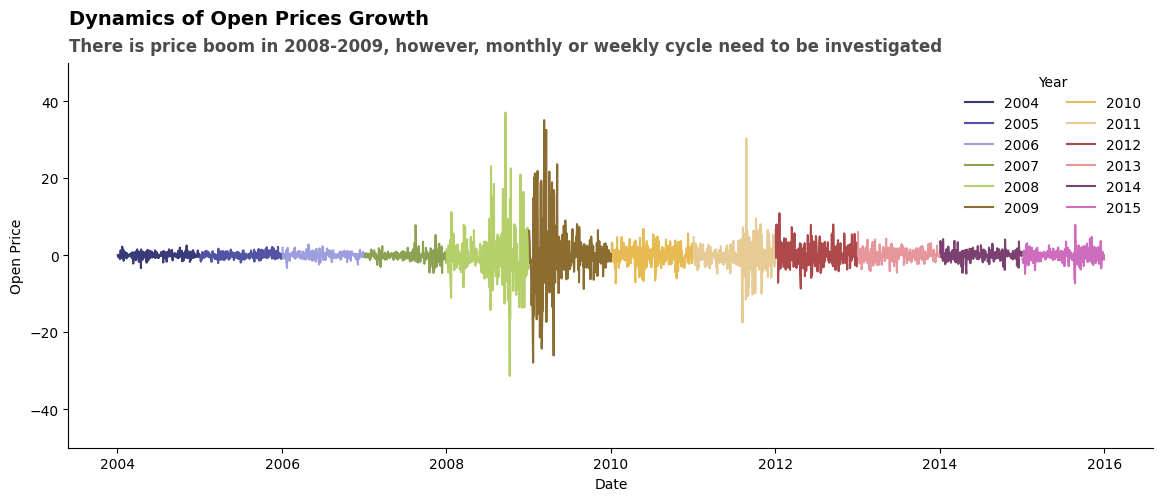

In [24]:
def make_yearly_open_growth(input):
    fig, ax = plt.subplots(figsize=[14, 5])
    years = input['Date'].dt.year.unique()
    cmap = plt.get_cmap('tab20b')

    for i, y in enumerate(years):
        yearly_data = input[input['Date'].dt.year == y]
        color = cmap(i / len(years))
        ax.plot(yearly_data['Date'], yearly_data['Open_Growth'],
                label=str(y), color=color)

    ax.set_xlabel('Date')
    ax.set_ylabel('Open Price')
    ax.legend(title='Year',
              ncol=2,
              frameon=False)
    ax.set_ylim(-50, 50)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.text(pd.to_datetime('2003-06-01'), 60,
            'Dynamics of Open Prices Growth',
            fontdict={
                        'weight': 'bold',
                        'size': 14
                      }
            )
    ax.text(pd.to_datetime('2003-06-01'), 53,
            'There is price boom in 2008-2009, however, monthly or weekly cycle need to be investigated',
            fontdict={
                        'weight': 'bold',
                        'size': 12
                      },
            alpha=0.7
            )

    return ax

make_yearly_open_growth(input=dataset)

## Graphics Customization

Motivation:
Since previous is likely showing us no clear patterns, we need to zoom-in to see if it really no patterns at all (monthly or weekly).

However, since we are gonna observe/manipulate a lot of columns and years, it require an algorithm to extract the column and year.

In [74]:
# Make a hashmap to map the data in each yearly key.
# For example, key '2015' will store all of the column with 2015 as a year
yearly_dataset = {}

# This line is user-defined input
# Suppose user wanna see 'Open' column, hence this input gonna move on make_a_yearly_dataset() function
input_column = input(str())

def make_a_yearly_dataset(input):
  '''
      This function do several things:
      1. First, it extracts data set's column based on user-defined input
      2. Second, each column initially has years span from 2004-2015. Each year will
         be mapped in each dictionary. This mapping process is done by getting the
         key's args which are years.
      3. Third, the function return the result. It will show 2015 since it is the
         latest active session in this for loop (2015 is the latest year in this
         data set)
  '''
  years = (dataset['Date'].dt.year).unique()

  for y in years:
    yearly_dataset[y] = dataset[['Date', input_column]].loc[dataset['Date'].dt.year == y]

  return yearly_dataset[y]

make_a_yearly_dataset(input=input_column)

Open


,Date,Open
2769,2015-01-02,17.990000
2770,2015-01-05,17.790001
2771,2015-01-06,17.420000
2772,2015-01-07,17.139999
2773,2015-01-08,17.160000
...,...,...
3016,2015-12-24,17.320000
3017,2015-12-28,17.219999
3018,2015-12-29,17.250000
3019,2015-12-30,17.200001


In [75]:
def extract_yearly_data(input):
  '''
      This function objective is mapping each year key in yearly_dataset variable
      to a variable. Hence, user could explore the zoomed-in [monthly] data in a
      preferred year. The mechanisms of this function are stated below.
      1. At every year in the input (which is yearly_dataset), there will be a
         global variable named 'yearly_year_dataset'
      2. After looping process is done, the function will return 11 years (from
         2004-2015).
      3. The index would not follow previous index in data set. Instead, it will
         return new index, from 0 incrementally to n-index.
      4. User could use whatever year he/she/they wanted to explore more.
      5. If we show the result of this function, it will show the column that has defined in
         input_column variable. For example, if user choose 'Open' in input_column,
         this function will return 'Open'.

      Caveats: this function may perform slow if you clone this in your local code editor.
      Why? all of the variables in this function will be stored in your local memory.
  '''
  for year in range(2004, 2016):
    globals()[f'yearly_{year}_dataset'] = input[year].reset_index(drop=True)

  return globals()[f'yearly_{year}_dataset']

extract_yearly_data(input=yearly_dataset)

# If user prefer 2015, user could type 2015 in the middle of yearly_(year)_dataset
yearly_2015_dataset

,Date,Open
0,2015-01-02,17.990000
1,2015-01-05,17.790001
2,2015-01-06,17.420000
3,2015-01-07,17.139999
4,2015-01-08,17.160000
...,...,...
247,2015-12-24,17.320000
248,2015-12-28,17.219999
249,2015-12-29,17.250000
250,2015-12-30,17.200001


In [94]:
yearly_2015_dataset.describe()

,Open
count,252.000000
mean,16.590357
std,0.835151
min,15.020000
25%,15.817500
50%,16.450001
75%,17.322500
max,18.389999


From descriptive statistics above, we can see that open price in 2015 is relatively stable. Look that the standard deviation below 1. The difference between min and max value does not enpicture a high gap.

<Axes: xlabel='Date in 2015', ylabel='Open'>

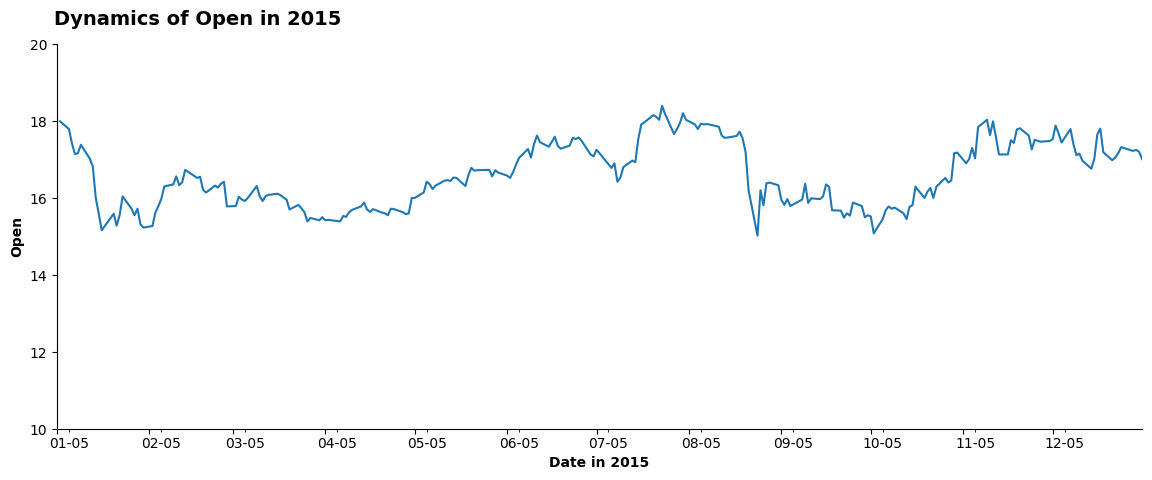

In [93]:
# We need to take a closer look. We could zoom in a certain year (for example, we can specify 2007)

def customize_graph(input):
    fig, ax = plt.subplots(figsize=[14, 5])
    ax.plot(input.iloc[:, 0], input.iloc[:, 1])

    year = input['Date'].dt.year[0]
    ax.set_xlabel(f"Date in {year}",
                  fontweight='bold')
    ax.set_ylabel(input.columns[1],
                  fontweight='bold')
    # If user define yearly_2007_dataset instead, user could change this ax.text
      # -- args to n-1 year, 2006-12-31
    ax.text(pd.to_datetime('2014-12-31'), 20.5,
            f'Dynamics of {input.columns[1]} in {year}',
            fontdict={
                      'size': 14,
                      'weight': 'bold'
                      })

    # Limit the figure's x-axis to the given year
    # For example, if the given year is 2015, it shows 2015-01-01 until 2015-12-31
      # -- not 2016-01-01
    first_year = input['Date'].dt.year[0]
    ax.set_xlim(pd.Timestamp(f'{first_year}-01-01'),
                pd.Timestamp(f'{first_year}-12-31'))
    ax.set_ylim(10, 20)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # To show both month and day, it needs two ticks
    # First, the minor one, will show a day, specifically 5-th day
    # Second, the major one, will show a month
    ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=5))
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%m-%d'))

    return ax

customize_graph(input=yearly_2015_dataset)

# **Conclusion**
1. Although no specific monthly pattern both in price components and volume (demand), we know there was a bigger story: the effects of 2008 economic recession.
2. The price and demand didn't respond each other simultaneously at the same time. Instead, there were a lot of lagging response in this case.
3. Prices were not the only factor to drive demand, there are also sentiments.

There are also a story that I didn't show yet: 2-in-1 stock split in 2004. Although no significant effects, compared to 2008 economic recession, surely it has an impact (particularly monthly impact), though.